# Integrated Predictive Analytics and Machine Learning for Enhanced Wildfire Risk Assessment in Alberta


## Data Loading

First, let's grab the information from the file named `wildfire_data.csv` and put it into a variable called `'data'` using `pandas`.


In [3]:
# import the necessary packages
import pandas as pd

# load the data
data = None

# Read CSV file using pandas
#data = pd.read_csv('Data/wildfire_data.csv') # for windows
data = pd.read_csv('C:/Users/MIAN/ENGO645-Final-Project/Data/wildfire_data.csv') # if MAC follow this

data.head(3)

,fire_year,fire_number,fire_name,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,industry_identifier_desc,...,distance_from_water_source,first_bucket_drop_date,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,2021,CWF001,NaN,0.01,A,49.410191,-114.318843,Provincial Park,Power Line Industry,NaN,...,NaN,NaN,1/13/2021 13:25,0.01,1/13/2021 13:25,0.01,NaN,NaN,1/13/2021 13:35,0.01
1,2021,CWF002,NaN,0.01,A,49.587753,-114.378655,Provincial Land,Recreation,NaN,...,NaN,NaN,1/29/2021 10:45,0.01,1/29/2021 10:45,0.01,NaN,NaN,1/29/2021 13:15,0.01
2,2021,CWF003,NaN,0.05,A,51.119500,-114.778950,Provincial Land,Resident,NaN,...,NaN,NaN,2/23/2021 10:42,0.05,2/23/2021 10:42,0.05,NaN,NaN,2/23/2021 10:52,0.05


In [4]:
# List of columns to be removed
columns_to_remove = ['fire_number', 'fire_name', 'size_class', 'industry_identifier_desc', 'responsible_group_desc', 'det_agent', 'det_agent_type', 'discovered_size', 'dispatched_resource', 'dispatch_date', 'assessment_resource', 'assessment_datetime', 'ia_access', 'bucketing_on_fire', 'first_bucket_drop_date', 'distance_from_water_source', 'bh_fs_date', 'bh_hectares', 'uc_fs_date', 'uc_hectares', 'to_fs_date', 'to_hectares', 'ex_fs_date', 'ex_hectares']

# Removing the specified columns
data_cleaned = data.drop(columns=columns_to_remove)

# Dropping rows with missing values in the remaining columns of the dataset
data_cleaned = data_cleaned.dropna()


data_cleaned.drop_duplicates(inplace=True)
data_cleaned.reset_index(drop=True, inplace=True)

data_cleaned.head()


,fire_year,current_size,fire_location_latitude,fire_location_longitude,fire_origin,general_cause_desc,activity_class,true_cause,fire_start_date,discovered_date,...,weather_conditions_over_fire,temperature,relative_humidity,wind_direction,wind_speed,fuel_type,initial_action_by,ia_arrival_at_fire_date,fire_fighting_start_date,fire_fighting_start_size
0,2021,0.01,49.410191,-114.318843,Provincial Park,Power Line Industry,Operations,Line Impact,1/13/2021 10:30,1/13/2021 11:35,...,Cloudy,4.0,65.0,W,30.0,C7,FPD Staff,1/13/2021 13:20,1/13/2021 13:25,0.01
1,2021,0.01,50.403817,-114.496917,Indian Reservation,Resident,Refuse Disposal,Unsafe Fire,7/4/2021 0:00,7/4/2021 1:30,...,Rainshowers,13.0,70.0,CLM,0.0,M2,FPD Staff,7/4/2021 3:22,7/4/2021 3:22,0.01
2,2021,29.60,53.752683,-116.657933,Provincial Land,Forest Industry,Debris Disposal,Unsafe Fire,4/16/2021 13:30,4/16/2021 13:50,...,Clear,23.0,18.0,SE,3.0,M1,HAC,4/16/2021 14:12,4/16/2021 14:27,0.30
3,2021,8.05,53.600200,-116.201400,Private Land,Agriculture Industry,Operations,Burning Substance,4/17/2021 14:13,4/17/2021 14:18,...,Clear,19.8,20.0,E,7.0,O1b,HAC,4/17/2021 14:35,4/17/2021 14:42,4.00
4,2021,479.30,53.414000,-115.785417,Provincial Land,Recreation,Cooking and Warming,Unsafe Fire,4/30/2021 11:00,4/30/2021 11:23,...,Clear,18.0,22.0,W,10.0,C3,HAC,4/30/2021 11:42,4/30/2021 12:03,10.00


In [5]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


## 1:Finding the most common reasons of wildfire.

Visualizing the most common causes of fires in a dataset by plotting a bar chart

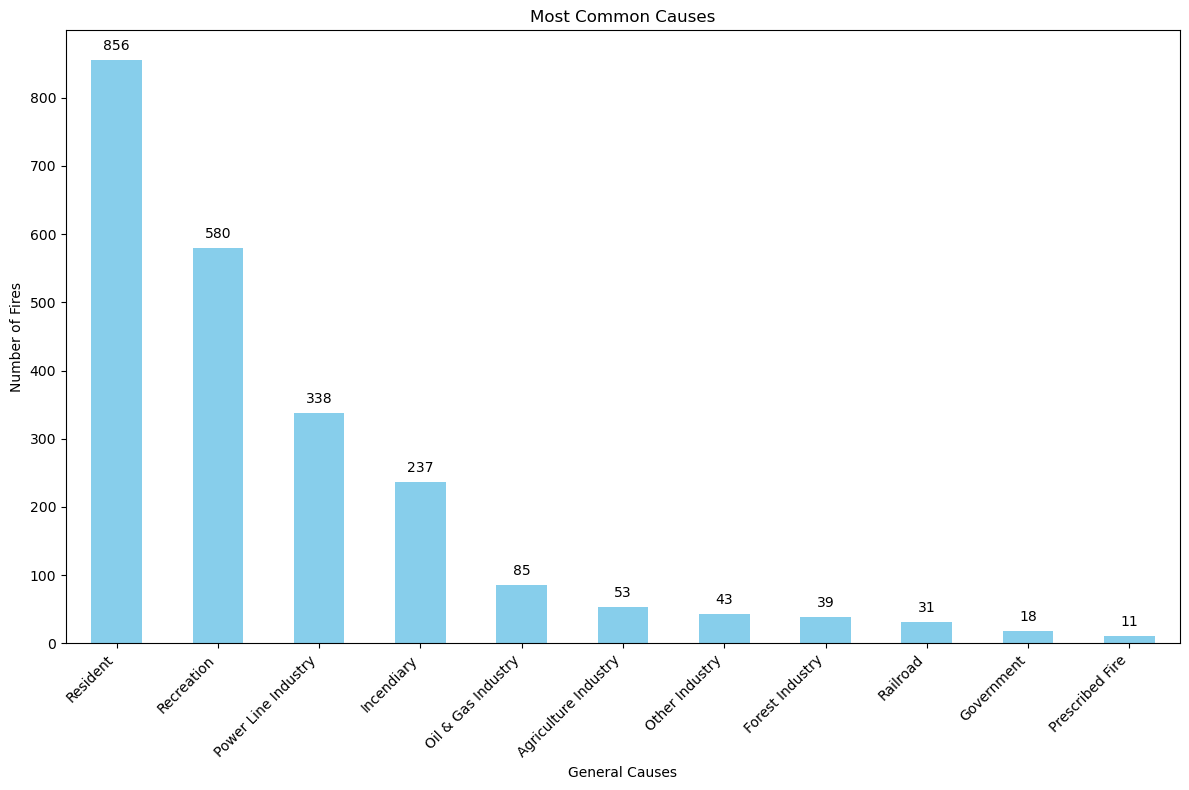

In [6]:
# Import the necessary package for plotting
import matplotlib.pyplot as plt
# Optionally, you can use seaborn for enhanced plot styling
# import seaborn as sns         

# Group the cleaned data by 'general_cause_desc' to aggregate similar causes and count occurrences
grouped_data = data_cleaned.groupby('general_cause_desc').size()

# Sort the aggregated data in descending order to highlight the most common causes of fires
general_causes = grouped_data.sort_values(ascending=False)

# Create a figure with a specified size to ensure the plot is large enough to be easily readable
plt.figure(figsize=(12, 8))
# Plot the sorted data as a bar chart with bars colored in sky blue
bars = general_causes.plot(kind='bar', color='skyblue')
# Set the title of the chart to 'Most Common Causes'
plt.title('Most Common Causes')
# Label the x-axis as 'General Causes' to indicate what the bars represent
plt.xlabel('General Causes')
# Label the y-axis as 'Number of Fires' to show the metric being measured
plt.ylabel('Number of Fires')
# Rotate the x-axis labels 45 degrees to the right for better legibility
plt.xticks(rotation=45, ha='right')

# Iterate through each bar to add an annotation displaying its height (the count of fires)
for bar in bars.patches:
    # Format the annotation text as an integer and position it above the bar
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points')

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
# Display the plot
plt.show()


## Convert Data to Transaction Format
In this step, we will prepare the data for the Fire Size Analysis with its general cause. Then, we will use the Apriori algorithm to find the most frequent itemsets in the data.

In [7]:
import pandas as pd

# Group the cleaned fire data by 'general_cause_desc' and 'current_size', then count occurrences in each group
fire_size_reasons = data_cleaned.groupby(['general_cause_desc', 'current_size']).size()

# Reshape the data to have 'general_cause_desc' as columns, 'current_size' as rows, 
# and the count of occurrences as values, filling missing values with 0
fire_size_reasons = fire_size_reasons.unstack(level='general_cause_desc', fill_value=0)

# Convert all positive counts to 1 to indicate presence of the cause in that size category, 
# keeping 0 as is to indicate absence. This is preparation for binary representation needed for Apriori.
fire_size_reasons = fire_size_reasons.applymap(lambda x: 1 if x > 0 else 0)

# Sort the DataFrame in descending order based on all columns to prioritize the most common combinations of cause and size
fire_size_reasons = fire_size_reasons.sort_values(by=list(fire_size_reasons.columns), ascending=[False]*len(fire_size_reasons.columns))


# This statement attempts to sort 'fire_size_reasons' by 'current_size' in descending order, 
fire_size_reasons = fire_size_reasons.sort_values(by='current_size', ascending=False)

# Display the first few rows of the prepared DataFrame to verify the format and sorting
fire_size_reasons.head()


general_cause_desc,Agriculture Industry,Forest Industry,Government,Incendiary,Oil & Gas Industry,Other Industry,Power Line Industry,Prescribed Fire,Railroad,Recreation,Resident
current_size,,,,,,,,,,,
87659.4,0,0,0,0,0,0,1,0,0,0,0
31997.0,0,0,0,0,1,0,0,0,0,0,0
17472.9,0,1,0,0,0,0,0,0,0,0,0
14554.3,0,0,0,0,0,1,0,0,0,0,0
5453.4,0,0,0,0,0,0,1,0,0,0,0


## Apply Apriori Algorithm

Applying Apriori Algorithm from mlxtend.frequent_patterns to find frequent itemsets.

In [8]:
from mlxtend.frequent_patterns import apriori

# The DataFrame 'fire_size_reasons' is converted to a boolean type.
# This is necessary for the Apriori algorithm, as it works with binary data,
# indicating the presence (True) or absence (False) of an item in each transaction.
fire_size_reasons = fire_size_reasons.astype(bool)

# Apply the Apriori algorithm to the boolean DataFrame.
# The 'min_support' parameter is set to 0.02, meaning only itemsets appearing in at least 2% of transactions
# will be considered. 'use_colnames=True'
frequent_itemsets = apriori(fire_size_reasons, min_support=0.02, use_colnames=True, low_memory=True)

# Display the found frequent itemsets, sorted by their support in descending order.
# The 'support' value indicates how frequently each itemset appears in the dataset,
# with higher values signifying more common itemsets.
frequent_itemsets.sort_values(by='support', ascending=False)


,support,itemsets
10,0.482659,(Resident)
9,0.355491,(Recreation)
6,0.274566,(Power Line Industry)
3,0.164740,(Incendiary)
51,0.156069,"(Resident, Recreation)"
...,...,...
157,0.020231,"(Power Line Industry, Oil & Gas Industry, Agri..."
231,0.020231,"(Railroad, Power Line Industry, Resident, Othe..."
230,0.020231,"(Railroad, Power Line Industry, Recreation, Ot..."
158,0.020231,"(Other Industry, Oil & Gas Industry, Agricultu..."


## Exploring DataFrame with 3 different support thresholds

In [9]:
frequent_itemsets_1 = None
frequent_itemsets_2 = None
frequent_itemsets_3 = None

# Setting minimum support to 0.1 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_1 = 0.1
frequent_itemsets_1 = apriori(fire_size_reasons, min_support=min_support_1, use_colnames=True)

# Setting minimum support to 0.15 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_2 = 0.15
frequent_itemsets_2 = apriori(fire_size_reasons, min_support=min_support_2, use_colnames=True)

# Setting minimum support to 0.25 and find frequent itemsets with a initialized minimum support using Apriori algorithm
min_support_3 = 0.25
frequent_itemsets_3 = apriori(fire_size_reasons, min_support=min_support_3, use_colnames=True)

In [10]:
######### This is a test-cell that print the frequent itemsets 1 #########

frequent_itemsets_1

,support,itemsets
0,0.164740,(Incendiary)
1,0.118497,(Oil & Gas Industry)
2,0.274566,(Power Line Industry)
3,0.355491,(Recreation)
4,0.482659,(Resident)
5,0.104046,"(Power Line Industry, Recreation)"
6,0.121387,"(Power Line Industry, Resident)"
7,0.156069,"(Resident, Recreation)"


In [11]:
######### This is a test-cell that print the frequent itemsets 2 #########

frequent_itemsets_2

,support,itemsets
0,0.164740,(Incendiary)
1,0.274566,(Power Line Industry)
2,0.355491,(Recreation)
3,0.482659,(Resident)
4,0.156069,"(Resident, Recreation)"


In [12]:
######### This is a test-cell that print the frequent itemsets 3 #########

frequent_itemsets_3

,support,itemsets
0,0.274566,(Power Line Industry)
1,0.355491,(Recreation)
2,0.482659,(Resident)


#### Explanation:

  We can see that the most frequent reasons are  Power Line Industry , Recreation and Residents  when threshold is set to 0.1, 0.15 and 0.25. The support value for the Power Line Industry is 0.274566 , Recreation is 0.355491 and Residents 0.482659   which means these are 27.54%(Power Line Industry) , 35.54%(Recreation) and 48.26%(Residents) that are the causes of all Wildfires. 

## Generate Association Rules.

After identifying frequent itemsets, genertaing association rules using the association_rules function

In [13]:
from mlxtend.frequent_patterns import association_rules

rules  = None

# Generate the rules with support metric and minimimum threshold 0.08
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.08)

# Display the dataframe
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Incendiary),(Recreation),0.164740,0.355491,0.095376,0.578947,1.628584,0.036812,1.530708,0.462095
1,(Recreation),(Incendiary),0.355491,0.164740,0.095376,0.268293,1.628584,0.036812,1.141522,0.598859
2,(Resident),(Incendiary),0.482659,0.164740,0.098266,0.203593,1.235844,0.018753,1.048785,0.368879
3,(Incendiary),(Resident),0.164740,0.482659,0.098266,0.596491,1.235844,0.018753,1.282106,0.228475
4,(Power Line Industry),(Recreation),0.274566,0.355491,0.104046,0.378947,1.065982,0.006440,1.037768,0.085325
5,(Recreation),(Power Line Industry),0.355491,0.274566,0.104046,0.292683,1.065982,0.006440,1.025613,0.096039
6,(Power Line Industry),(Resident),0.274566,0.482659,0.121387,0.442105,0.915979,-0.011135,0.927309,-0.112253
7,(Resident),(Power Line Industry),0.482659,0.274566,0.121387,0.251497,0.915979,-0.011135,0.969179,-0.150604
8,(Resident),(Recreation),0.482659,0.355491,0.156069,0.323353,0.909595,-0.015512,0.952504,-0.161156
9,(Recreation),(Resident),0.355491,0.482659,0.156069,0.439024,0.909595,-0.015512,0.922217,-0.133607


## Visualizing itemset support 
Heatmaps help us understand a large number of rules between a small number of antecedents and consequents

In [14]:
# Convert the frozensets into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Display the first 5 rows of the dataframe
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Incendiary,Recreation,0.164740,0.355491,0.095376,0.578947,1.628584,0.036812,1.530708,0.462095
1,Recreation,Incendiary,0.355491,0.164740,0.095376,0.268293,1.628584,0.036812,1.141522,0.598859
2,Resident,Incendiary,0.482659,0.164740,0.098266,0.203593,1.235844,0.018753,1.048785,0.368879
3,Incendiary,Resident,0.164740,0.482659,0.098266,0.596491,1.235844,0.018753,1.282106,0.228475
4,Power Line Industry,Recreation,0.274566,0.355491,0.104046,0.378947,1.065982,0.006440,1.037768,0.085325


In [15]:
# Create a pivot table for the rules
pivot_rules = rules.pivot_table(index='consequents', columns='antecedents', values='support')
# Display the rows of the dataframe
pivot_rules

antecedents,Incendiary,"Incendiary,Recreation",Power Line Industry,"Power Line Industry,Recreation","Power Line Industry,Resident",Recreation,Resident,"Resident,Incendiary","Resident,Recreation"
consequents,,,,,,,,,
Incendiary,NaN,NaN,NaN,NaN,NaN,0.095376,0.098266,NaN,0.080925
"Incendiary,Recreation",NaN,NaN,NaN,NaN,NaN,NaN,0.080925,NaN,NaN
Power Line Industry,NaN,NaN,NaN,NaN,NaN,0.104046,0.121387,NaN,0.083815
"Power Line Industry,Recreation",NaN,NaN,NaN,NaN,NaN,NaN,0.083815,NaN,NaN
"Power Line Industry,Resident",NaN,NaN,NaN,NaN,NaN,0.083815,NaN,NaN,NaN
Recreation,0.095376,NaN,0.104046,NaN,0.083815,NaN,0.156069,0.080925,NaN
Resident,0.098266,0.080925,0.121387,0.083815,NaN,0.156069,NaN,NaN,NaN
"Resident,Incendiary",NaN,NaN,NaN,NaN,NaN,0.080925,NaN,NaN,NaN
"Resident,Recreation",0.080925,NaN,0.083815,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pip install seaborn --upgrade 

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 245.8 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/294.9 kB 595.3 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the k

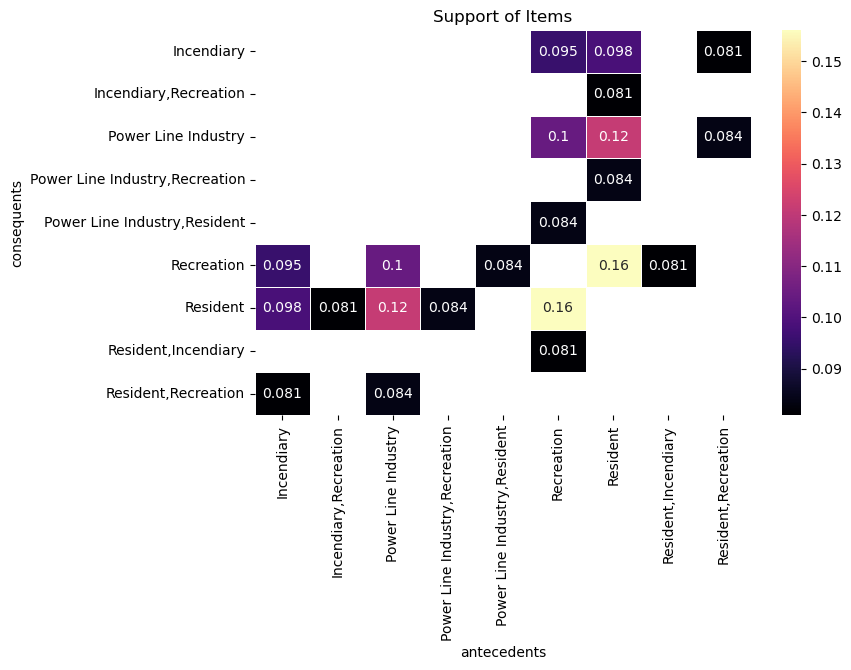

In [17]:
import seaborn as sns

# Plot the pivot table
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_rules, annot=True, cmap="magma", linewidths=0.5)
plt.title("Support of Items")
plt.show()

## Exploring Geographic Patterns

In [34]:
#!pip install geopandas
import geopandas as gpd
import os

us_states = None

# Read the US state shapefile using GeoPandas
alberta_cities = gpd.read_file(os.path.join('Data', "AlbertaCities.csv"))

##  Showing the data on folium map

In [50]:
import folium
from folium.plugins import MarkerCluster

# Optionally, set the initial map location to the first item in your DataFrame
initial_location = [ 55.0000 ,  -115.0000 ]

# Create a map object, centered on the initial location
m = folium.Map(location=initial_location, zoom_start=6)
# Select the 1000 fire points
fire_data = data_cleaned.head(1000)

# Create the MarkerCluster using the coordinates
marker_cluster = MarkerCluster(list(zip(fire_data["fire_location_latitude"], customer_data["fire_location_longitude"])))
m.add_child(marker_cluster)

# Iterate through the DataFrame and add each data point as a marker
for index, row in alberta_cities.iterrows():
    folium.Marker(
        [row['lat'], row['lng']], # Position
        popup=f"{row['city']}: {row['city']}", # Popup text
        tooltip=row['city'] # Tooltip text on hover
    ).add_to(m)
# Display the map
m